##  Plotting

In this tutorial, we will explore how to plot the data obtained with SWAMP-E.

In [1]:
%pip install -i https://test.pypi.org/simple/ SWAMPE==0.0.50

Looking in indexes: https://test.pypi.org/simple/



In [2]:
import os
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import SWAMPE

In [3]:
# load  reference data
data_dir1 = os.path.abspath('../../../SWAMPE/reference_data/HJ_taurad_100/')+'\\'
timestamp1=710
eta1, delta1, Phi1, U1, V1 =SWAMPE.continuation.load_data(timestamp1,custompath=data_dir1)
data_dir2 = os.path.abspath('../../../SWAMPE/reference_data/HJ_taurad_0p1/')+'\\'
timestamp2=650
eta2, delta2, Phi2, U2, V2 =SWAMPE.continuation.load_data(timestamp2,custompath=data_dir2)

#generate the latitudes and longitude of matching resolution
M=42
N,I,J,dt,lambdas,mus,w=SWAMPE.initial_conditions.spectral_params(M)

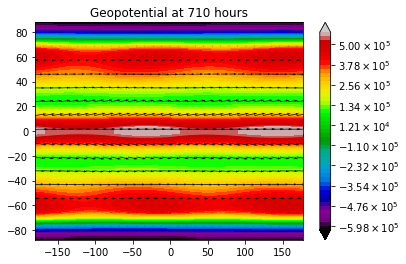

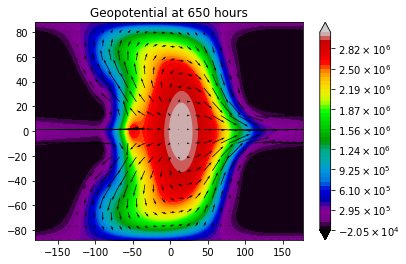

In [4]:
# plot the geopotential field with the overlayed wind field

fig1=SWAMPE.plotting.quiver_geopot_plot(U1,V1,Phi1,lambdas,mus,timestamp1)
fig2=SWAMPE.plotting.quiver_geopot_plot(U2,V2,Phi2,lambdas,mus,timestamp2)

We can change the limits of the colorbar. This can be useful for comparing the outputs of multiple simulations.

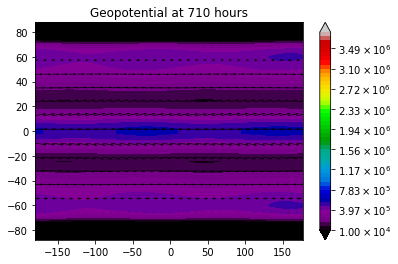

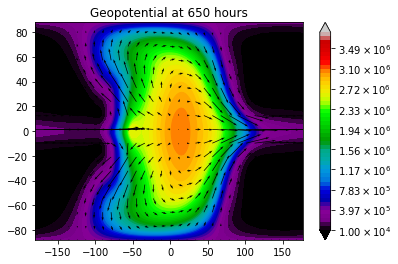

In [5]:
#change min/maxlevel
Phibar=4*10**6
fig1=SWAMPE.plotting.quiver_geopot_plot(U1,V1,Phi1,lambdas,mus,timestamp1,minlevel=10**4,maxlevel=3.8*10**6)
fig2=SWAMPE.plotting.quiver_geopot_plot(U2,V2,Phi2,lambdas,mus,timestamp2,minlevel=10**4,maxlevel=3.8*10**6)

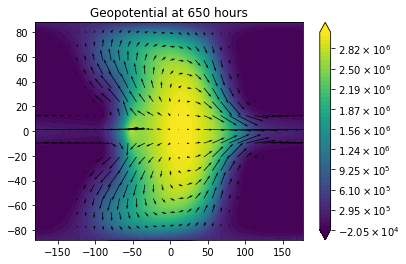

In [6]:
#change colormap
colormap=cm.viridis
fig=SWAMPE.plotting.quiver_geopot_plot(U2,V2,Phi2,lambdas,mus,timestamp2,colormap=colormap)

We can also change the density of the wind vector field using sparseness. 

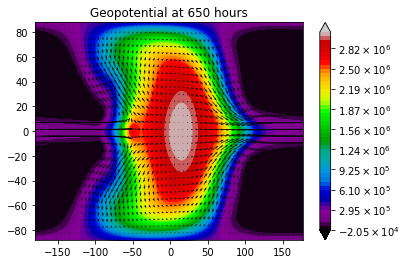

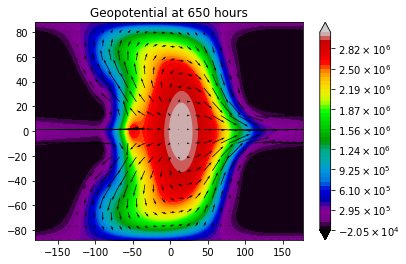

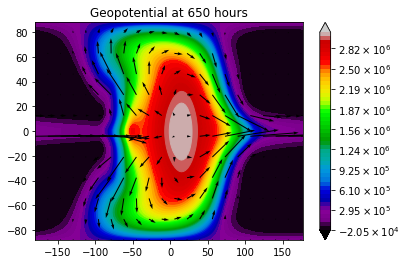

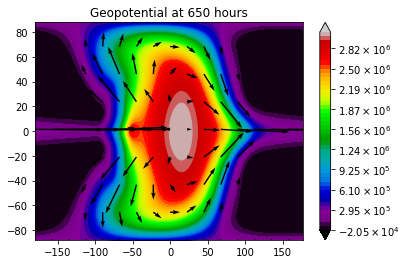

In [7]:
#change sparseness
sparsenessvec=[2,4,6,8]
for i in range(len(sparsenessvec)):
    fig=SWAMPE.plotting.quiver_geopot_plot(U2,V2,Phi2,lambdas,mus,timestamp2,sparseness=sparsenessvec[i])

We can also save the figure. By default, SWAMPE will create a "plots" directory in the current folder. 
You can also provide a custom path using the optional argument "custompath".

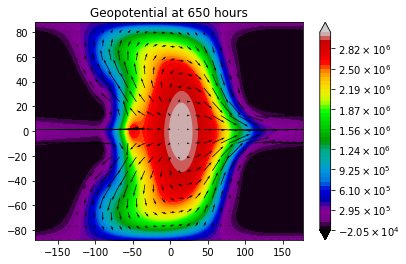

In [8]:
#save figure tutorial

fig=SWAMPE.plotting.quiver_geopot_plot(U2,V2,Phi2,lambdas,mus,timestamp2,savemyfig=True,filename='geopotfig.pdf')

Now let's plot mean zonal winds:

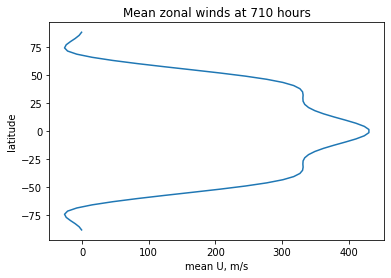

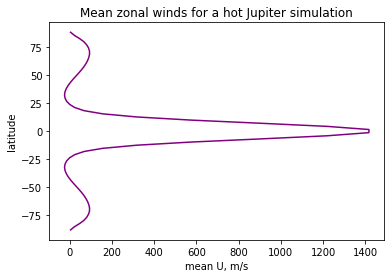

In [43]:
# plot mean zonal winds
fig1=SWAMPE.plotting.mean_zonal_wind_plot(U1,mus,timestamp1)
plt.show()
fig2=SWAMPE.plotting.mean_zonal_wind_plot(U2,mus,timestamp2,color='purple',customtitle='Mean zonal winds for a hot Jupiter simulation')

These plots can also be saved similarly to the quiver geopotential plots using "savemyfig".

GCM simulations can take a while to run. SWAMPE can save spin-up data, specifically RMS wind data as well as the minimum and maximum geopotential.

In [41]:
#load RMS winds
data_dir_spinup = os.path.abspath('../../../SWAMPE/reference_data/spinup_data/')+'\\'
spinup_winds=SWAMPE.continuation.read_pickle('spinup-winds',custompath=data_dir_spinup)
spinup_geopot=SWAMPE.continuation.read_pickle('spinup-geopot',custompath=data_dir_spinup)

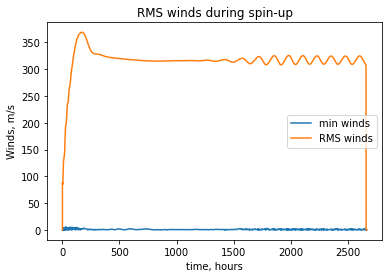

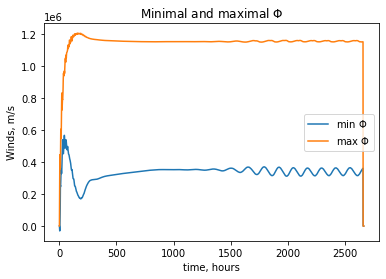

In [42]:
# plot RMS winds
SWAMPE.plotting.spinup_plot(spinup_winds,30)
#plot minimal and maximal geopotential
SWAMPE.plotting.spinup_plot(spinup_geopot,30,customlegend=['min $\Phi$','max $\Phi$'],customtitle='Minimal and maximal $\Phi$')

### Creating gifs

While many simulations converge to a constant steady-state, in many settings, oscillations are present. In these circumstances, it can be helpful to combine several snapshots into a gif.

In [11]:
## load reference data -- run test 1?


In [17]:
import imageio
## make a geopotential gif
num_snapshots=11
timestamps=np.zeros(num_snapshots)

Phidata=np.zeros((num_snapshots,J,I))
Udata=np.zeros((num_snapshots,J,I))
Vdata=np.zeros((num_snapshots,J,I))

#load data
data_dir3 = os.path.abspath('../../../SWAMPE/reference_data/SN_for_gif/')+'\\'


for i in range(num_snapshots):      
    timestamp=int(2500+10*i)
    timestamps[i]=timestamp
    eta, delta, Phi, U, V =SWAMPE.continuation.load_data(timestamp,custompath=data_dir3)
    Phidata[i,:,:]=Phi
    Udata[i,:,:]=U
    Vdata[i,:,:]=V



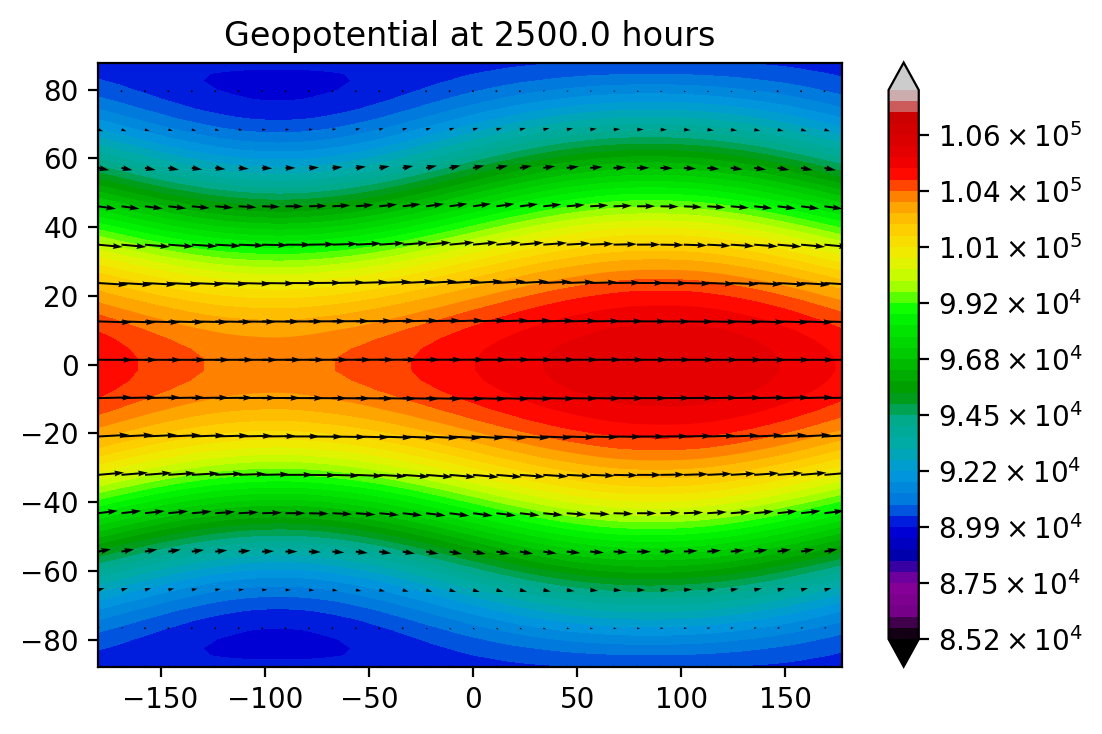

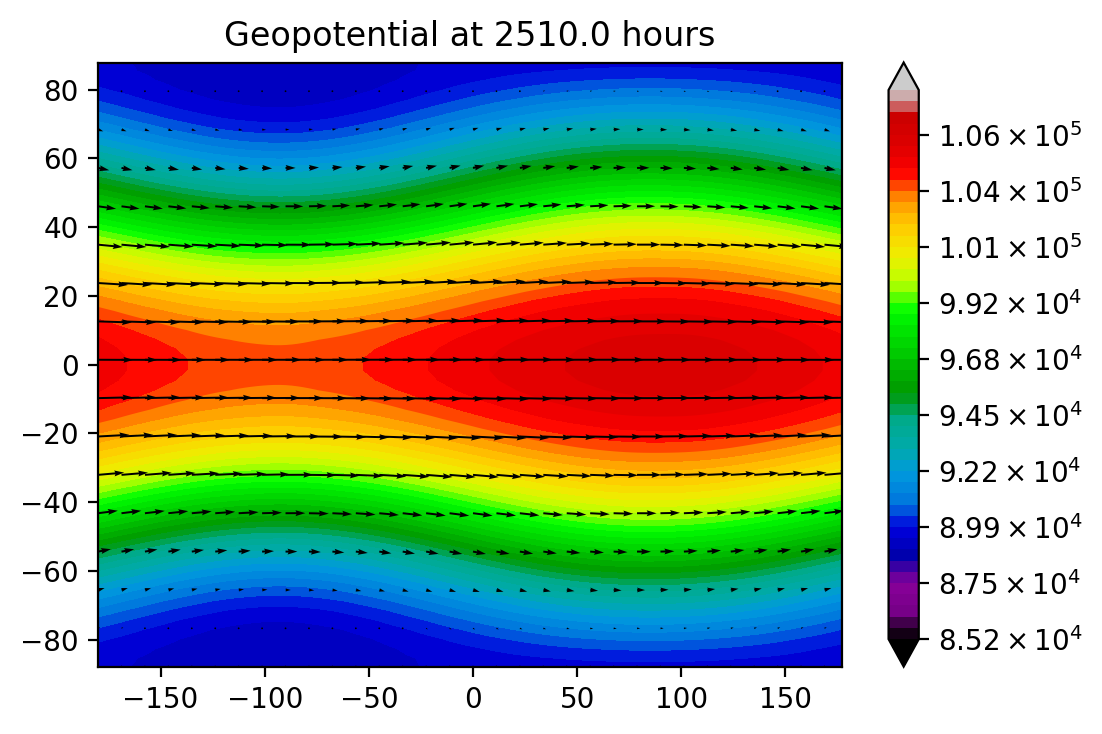

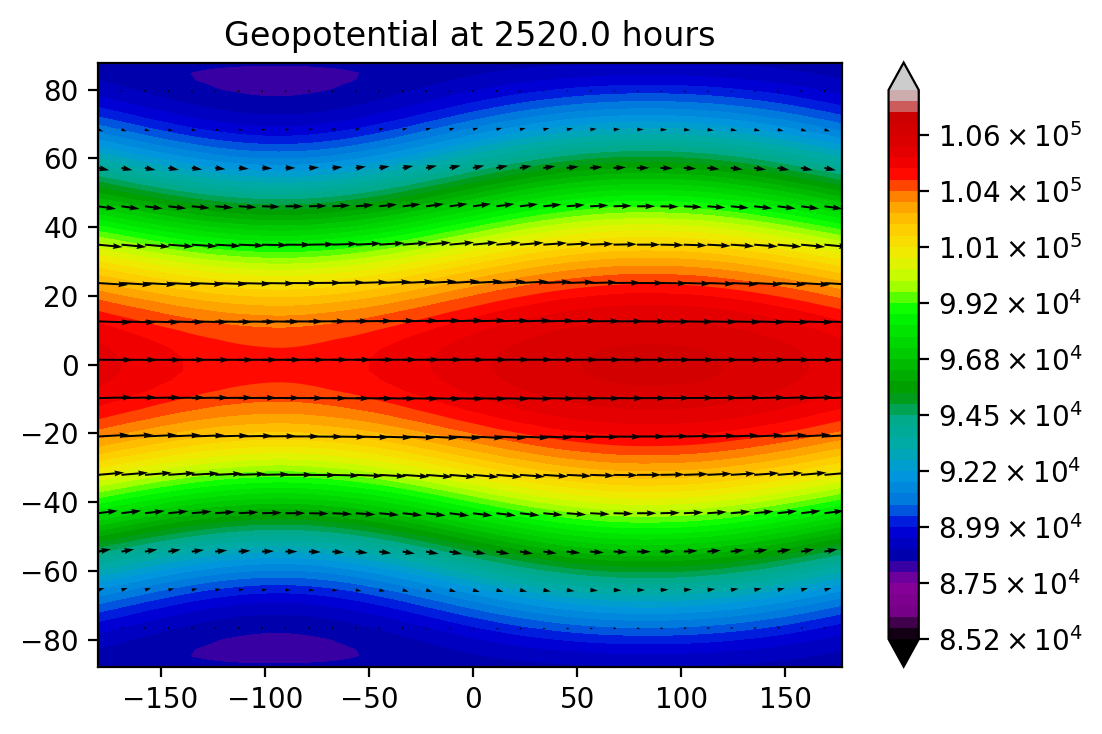

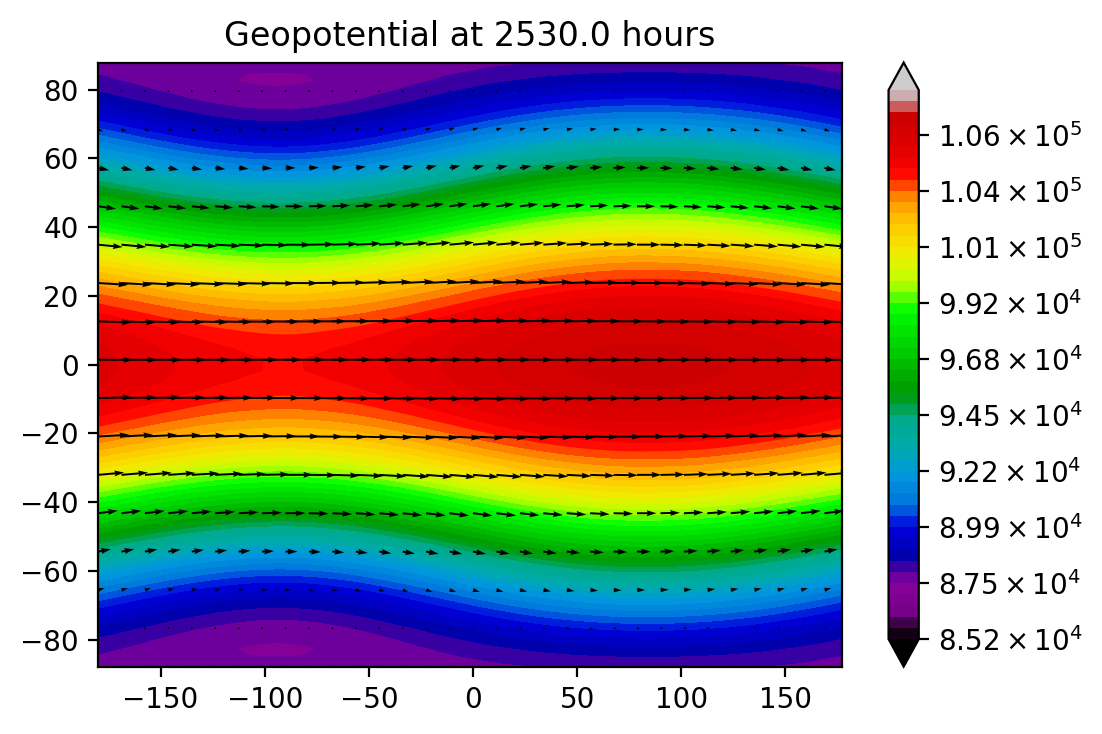

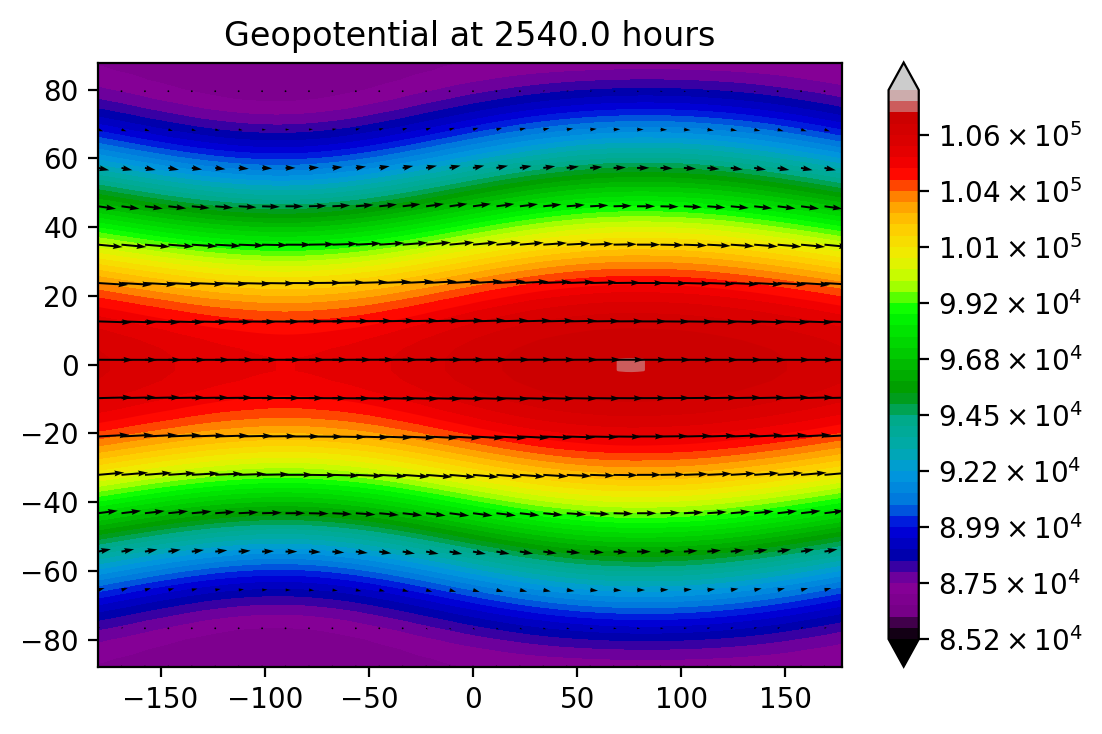

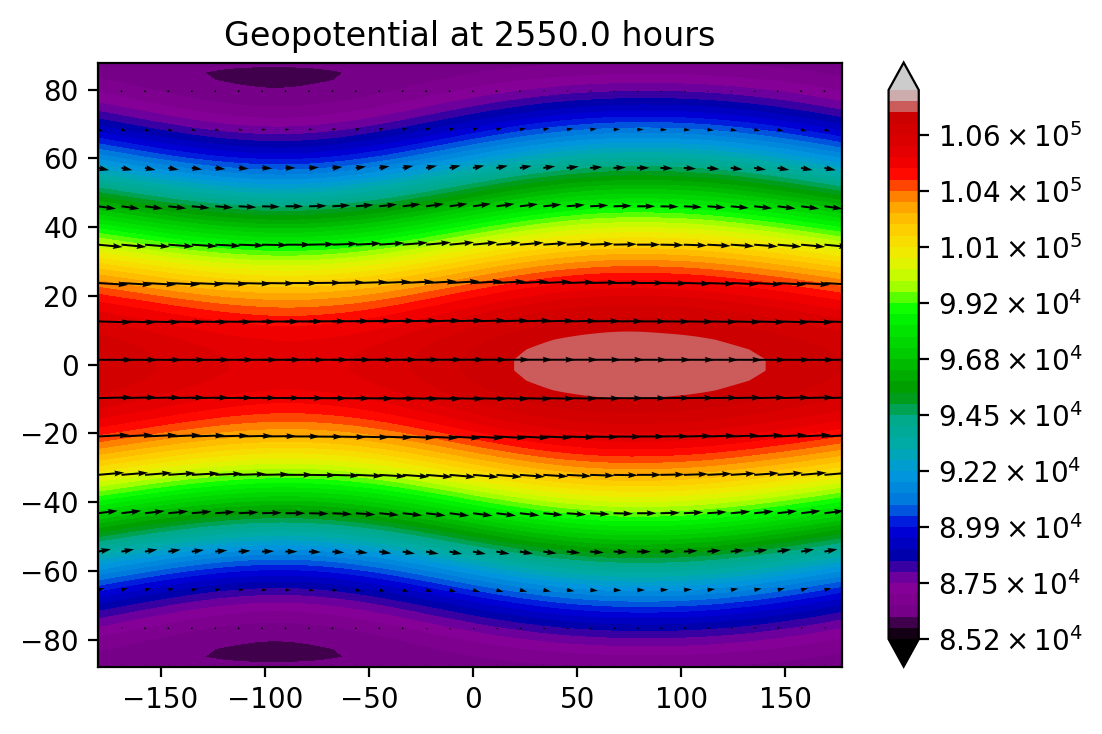

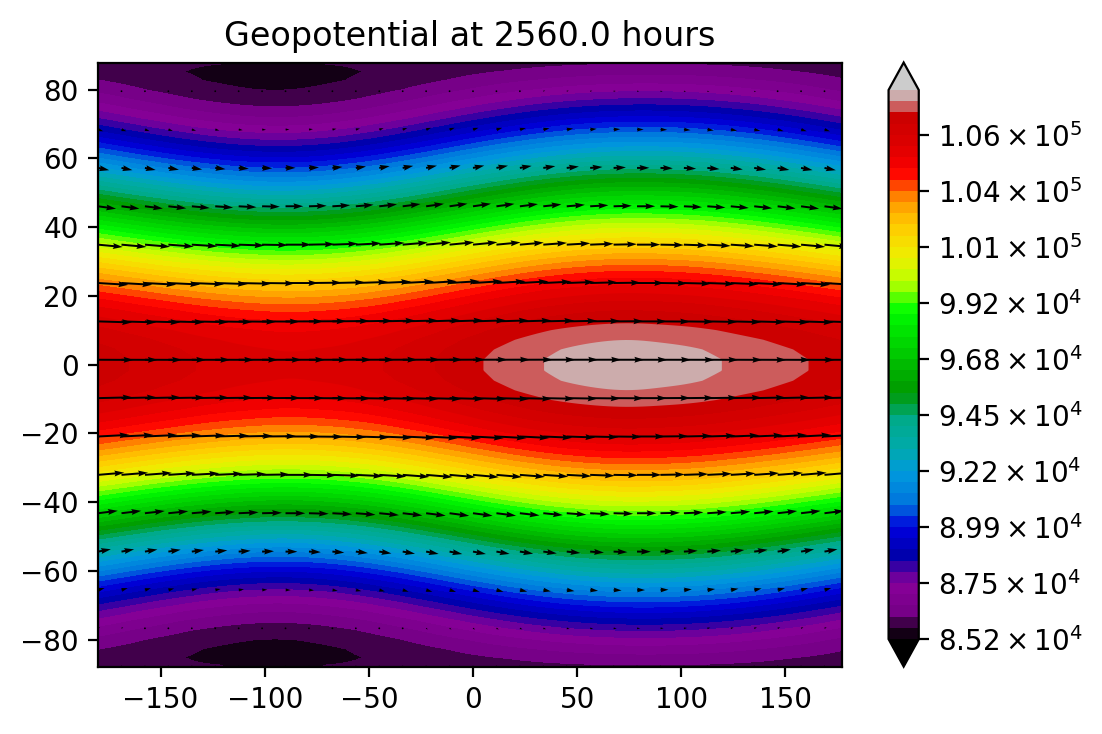

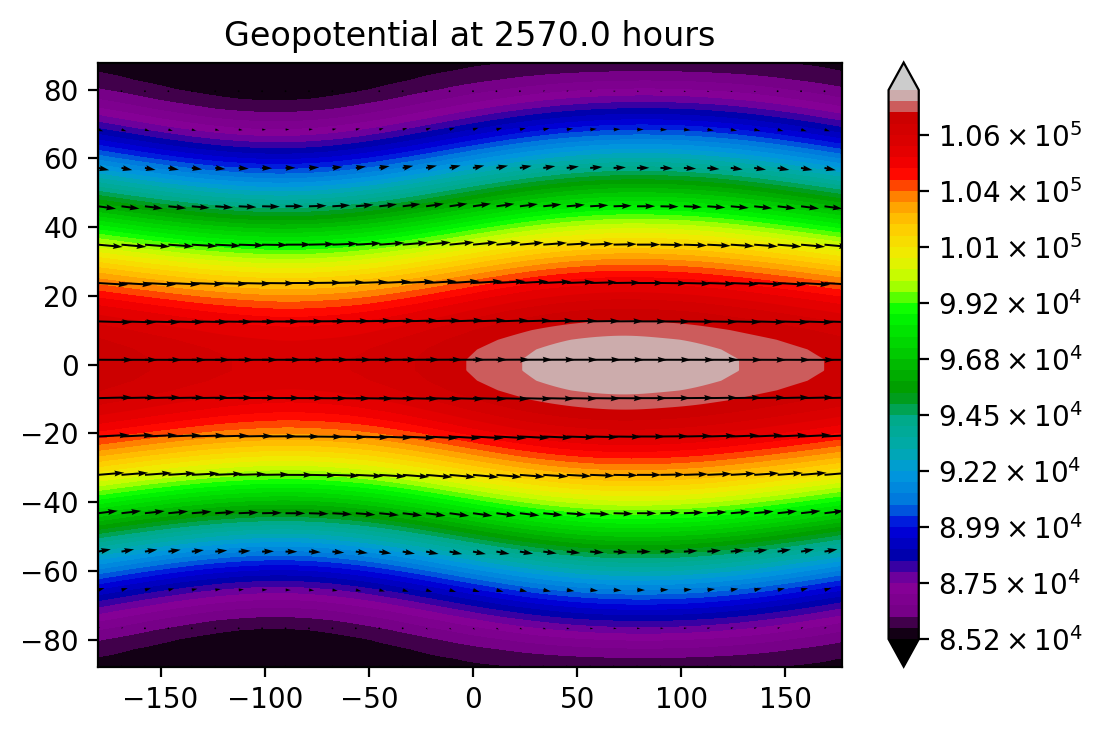

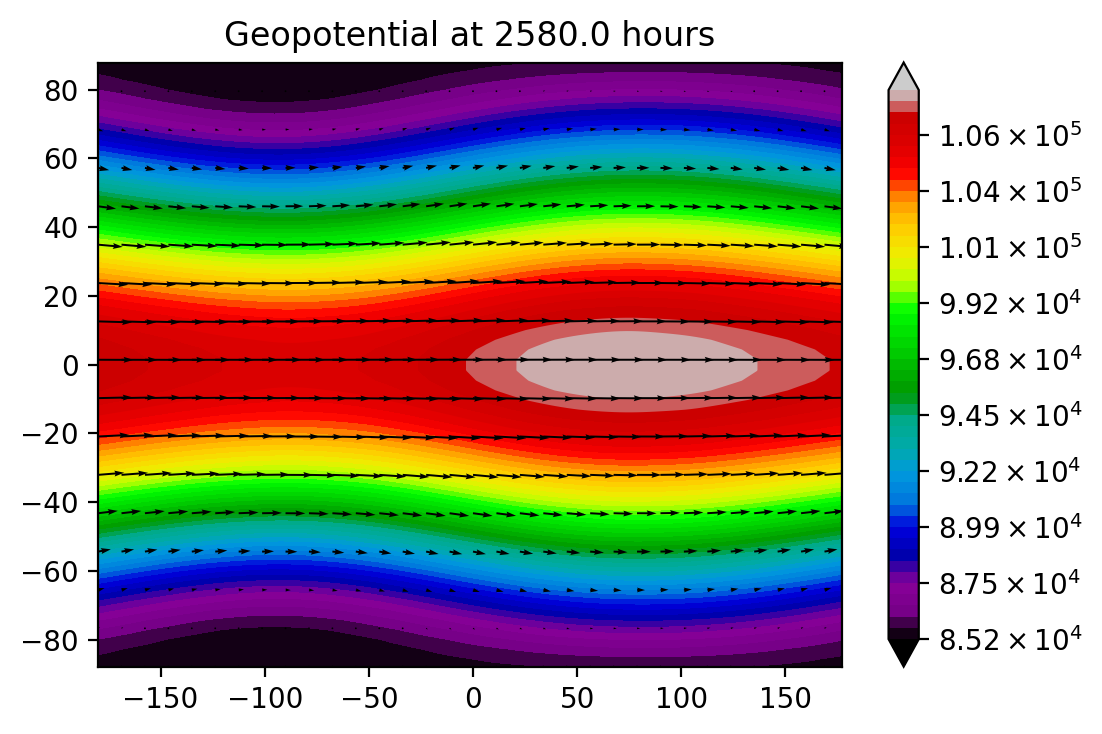

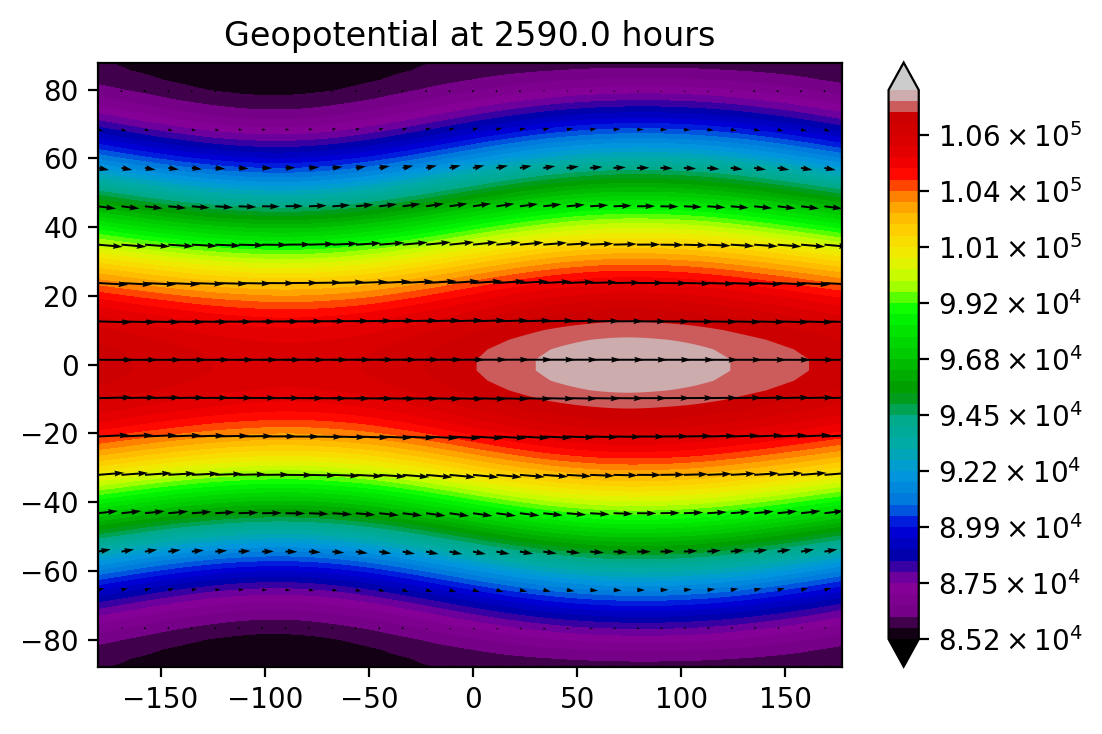

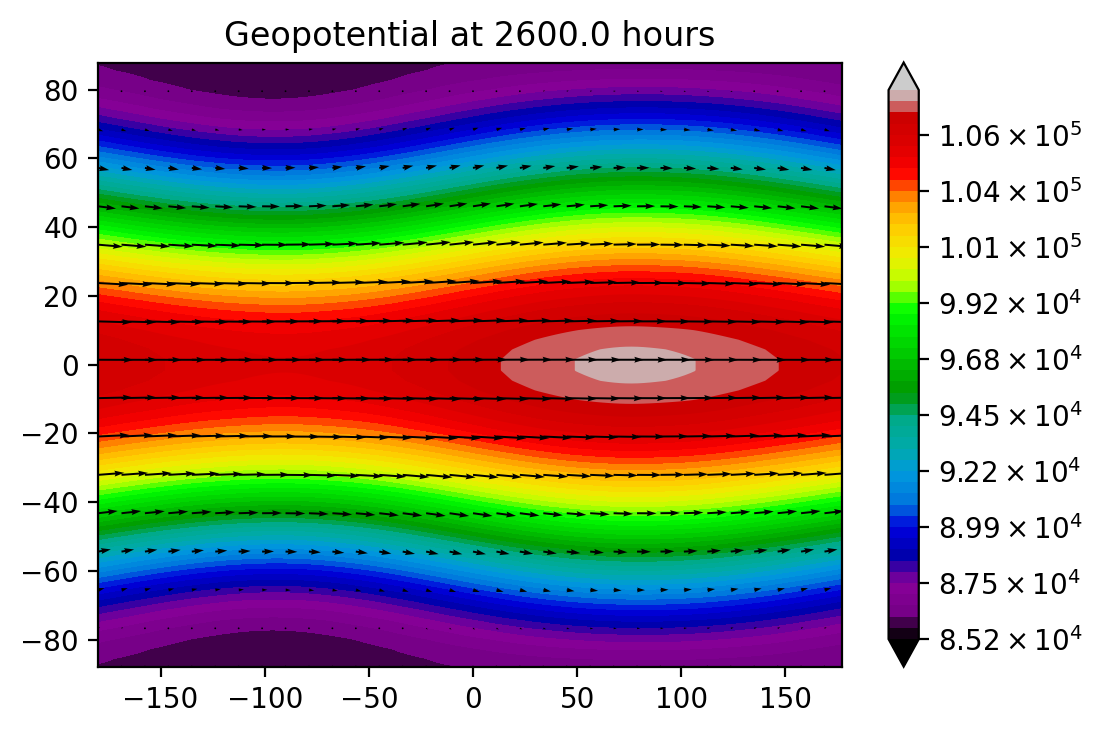

In [19]:
SWAMPE.plotting.write_quiver_gif(lambdas,mus,Phidata,Udata,Vdata,timestamps,'testgif.gif',sparseness=4,frms=5);

In [14]:
## make a mean zonal winds gif